In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
class Point:
    b = 7
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y
        
    def copy(self):
        return Point(self.x, self.y)
    
    def is_zero(self):
        return self.x > 1e20 or self.x < -1e20
    
    def neg(self):
        return Point(self.x, -self.y)

    def dbl(self):
        if self.is_zero():
            return self.copy()
        try:
            L = (3 * self.x * self.x) / (2 * self.y)
        except ZeroDivisionError:
            return Point()
        x = L * L - 2 * self.x
        return Point(x, L * (self.x - x) - self.y)

    def add(self, q):
        if self.x == q.x and self.y == q.y:
            return self.dbl()
        if self.is_zero():
            return q.copy()
        if q.is_zero():
            return self.copy()
        try:
            L = (q.y - self.y) / (q.x - self.x)
        except ZeroDivisionError:
            return Point()
        x = L * L - self.x - q.x
        return Point(x, L * (self.x - x) - self.y)
    
    def mul(self, n):
        p = self.copy()
        r = Point()
        i = 1
        while i <= n:
            if i & n:
                r = r.add(p)
            p = p.dbl()
            i <<= 1
        return r
    
    def __str__(self):
        return "({:.3f}, {:.3f})".format(self.x, self.y)
    
    def values(self):
        return (self.x, self.y)
def show(s, p):
    print(s, "Zero" if p.is_zero() else p)

def from_y(y):
    n = y * y - Point.b
    x = n ** (1./3) if n>=0 else -((-n)**(1./3))
    return Point(x, y)


In [21]:
a = from_y(my_x)
b = from_y(my_y)
show("a =", a)
show("b =", b)
c = a.add(b)
show("c = a + b =", c)
d = c.neg()
show("d = -c =", d)
show("c + d =", c.add(d))
show("a + b + d =", a.add(b.add(d)))
show("a * 12345 =", a.mul(12345))


a = (3.072, 6.000)
b = (2.080, 4.000)
c = a + b = (-1.090, 2.389)
d = -c = (-1.090, -2.389)
c + d = Zero
a + b + d = Zero
a * 12345 = (2.488, 4.734)


In [22]:
def elliptic_func(x, a, b):
    return np.sqrt(x**3 + a * x + b)

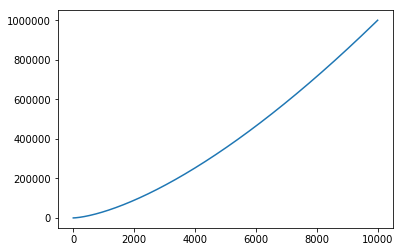

In [29]:
x = np.arange(0, 10000, 0.1)
y = [elliptic_func(xi, a.values()[0] + a.values()[1], b.values()[0] + b.values()[1]) for xi in x]
plt.plot(x, y)
# print(x)
# print(y)

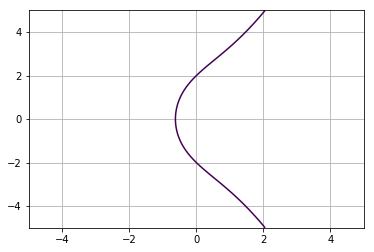

In [35]:
my_a = 6 # Kachko
my_b = 4 # Ilya

def elliptic_draw(a, b, save_plot=False):
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    plt.grid()
    if save_plot:
        plt.savefig("ikachko_elliptic_curve.png")
    plt.show()
    
elliptic_draw(my_a, my_b, save_plot=True)